In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sbn
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from math import ceil

import scipy.stats as stats
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

import matplotlib.pyplot as plt

from pandas.plotting import scatter_matrix

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.base import clone
import scipy.stats as scs
import statsmodels.api as sm




from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score


import timeit
import datetime as dt

import pandasql as ps

In [54]:
data = pd.read_csv('~/Downloads/EIA930_BALANCE_2020_Jan_Jun.csv')
data_2 = pd.read_csv('~/Downloads/EIA930_BALANCE_2020_Jul_Dec.csv')

/Users/cp/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3147: DtypeWarning: Columns (11,14,15,16,17,19,20,21) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/cp/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3147: DtypeWarning: Columns (11,14,16,17,19,20,21) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [55]:
def change_cols_to_floats(dataframe,lst):
    
    for i in lst:
        dataframe[i] = dataframe[i].str.replace(',', '')
        dataframe[i] = dataframe[i].astype(float)
    return dataframe
def make_date_time_col(df):
    df['Hour Number'] = df_total['Hour Number'].replace(24, 0)
    df['Hour Number'] = df_total['Hour Number'].replace(25, 0)
    df['Data Date']= df['Data Date'].astype(str)
    df['Hour Number'] = df['Hour Number'].astype(str)
    df['New_datetime'] = df['Data Date'].map(str) + " " + df['Hour Number']
    df['Hour Number'] = df['Hour Number'].astype(int)
    
    return df

def make_hourly_demand_means(df,lst):
    d = {}
    for i in lst:
        filt =df['Hour Number']==i
        d[i] = df.loc[filt]['Demand (MW)'].mean()
    return d

In [56]:
lst_cols = ['Demand (MW)','Net Generation (MW) from Natural Gas', 'Net Generation (MW) from Nuclear','Net Generation (MW) from All Petroleum Products','Net Generation (MW) from Hydropower and Pumped Storage', 'Net Generation (MW) from Solar', 'Net Generation (MW) from Wind', 'Net Generation (MW) from Other Fuel Sources','Net Generation (MW)','Demand Forecast (MW)', 'Total Interchange (MW)', 'Net Generation (MW) (Adjusted)','Net Generation (MW) from Coal','Sum(Valid DIBAs) (MW)','Demand (MW) (Imputed)', 'Net Generation (MW) (Imputed)','Demand (MW) (Adjusted)']
data_convert = change_cols_to_floats(data, lst_cols)
data_2_convert = change_cols_to_floats(data_2, lst_cols)

In [57]:
lst_data = [data_convert,data_2_convert]
df_total = pd.concat(lst_data)

In [58]:
make_date_time_col(df_total)

,Balancing Authority,Data Date,Hour Number,Local Time at End of Hour,UTC Time at End of Hour,Demand Forecast (MW),Demand (MW),Net Generation (MW),Total Interchange (MW),Sum(Valid DIBAs) (MW),...,Net Generation (MW) from Coal,Net Generation (MW) from Natural Gas,Net Generation (MW) from Nuclear,Net Generation (MW) from All Petroleum Products,Net Generation (MW) from Hydropower and Pumped Storage,Net Generation (MW) from Solar,Net Generation (MW) from Wind,Net Generation (MW) from Other Fuel Sources,Net Generation (MW) from Unknown Fuel Sources,New_datetime
0,AEC,01/01/2020,1,01/01/2020 1:00:00 AM,01/01/2020 7:00:00 AM,1082.0,549.0,722.0,173.0,173.0,...,-5.0,722.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,01/01/2020 1
1,AEC,01/01/2020,2,01/01/2020 2:00:00 AM,01/01/2020 8:00:00 AM,1084.0,549.0,724.0,175.0,175.0,...,-3.0,722.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,01/01/2020 2
2,AEC,01/01/2020,3,01/01/2020 3:00:00 AM,01/01/2020 9:00:00 AM,1103.0,554.0,718.0,164.0,164.0,...,-6.0,719.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,01/01/2020 3
3,AEC,01/01/2020,4,01/01/2020 4:00:00 AM,01/01/2020 10:00:00 AM,1127.0,565.0,715.0,150.0,150.0,...,-4.0,714.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,01/01/2020 4
4,AEC,01/01/2020,5,01/01/2020 5:00:00 AM,01/01/2020 11:00:00 AM,1179.0,575.0,718.0,143.0,143.0,...,-4.0,717.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,01/01/2020 5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282671,YAD,12/31/2020,20,12/31/2020 8:00:00 PM,01/01/2021 1:00:00 AM,NaN,NaN,154.0,150.0,150.0,...,NaN,NaN,NaN,NaN,154.0,NaN,NaN,NaN,NaN,12/31/2020 20
282672,YAD,12/31/2020,21,12/31/2020 9:00:00 PM,01/01/2021 2:00:00 AM,NaN,NaN,153.0,150.0,150.0,...,NaN,NaN,NaN,NaN,153.0,NaN,NaN,NaN,NaN,12/31/2020 21
282673,YAD,12/31/2020,22,12/31/2020 10:00:00 PM,01/01/2021 3:00:00 AM,NaN,NaN,154.0,150.0,150.0,...,NaN,NaN,NaN,NaN,154.0,NaN,NaN,NaN,NaN,12/31/2020 22
282674,YAD,12/31/2020,23,12/31/2020 11:00:00 PM,01/01/2021 4:00:00 AM,NaN,NaN,154.0,151.0,151.0,...,NaN,NaN,NaN,NaN,154.0,NaN,NaN,NaN,NaN,12/31/2020 23


In [59]:
df_total['New_datetime']= df_total['New_datetime'].apply(lambda x:f'{x}:00:00')

In [60]:
df_total['New_datetime'] = pd.to_datetime(df_total['New_datetime'],infer_datetime_format=True, format ='%m/%d/%Y %H')

In [61]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 562344 entries, 0 to 282675
Data columns (total 24 columns):
 #   Column                                                  Non-Null Count   Dtype         
---  ------                                                  --------------   -----         
 0   Balancing Authority                                     562344 non-null  object        
 1   Data Date                                               562344 non-null  object        
 2   Hour Number                                             562344 non-null  int64         
 3   Local Time at End of Hour                               562344 non-null  object        
 4   UTC Time at End of Hour                                 562344 non-null  object        
 5   Demand Forecast (MW)                                    463182 non-null  float64       
 6   Demand (MW)                                             471116 non-null  float64       
 7   Net Generation (MW)                            

In [62]:
df_total['Hour Number'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23,  0])

In [63]:
df_total['Demand Delta'] = df_total['Demand Forecast (MW)']- df_total['Demand (MW)']

In [64]:
df_total['Net Generation Delta'] = df_total['Net Generation (MW)']- df_total['Demand (MW)']

In [65]:
lst_hours = np.arange(0,24)
# make_hourly_demand_means(df_total, lst_hours)


df_total['Hour Number'].unique()

make_hourly_demand_means(df_total, lst_hours)

{0: 6922.334387109932,
 1: 6468.399511301161,
 2: 7152.640769779045,
 3: 6998.285416030146,
 4: 6080.086872390264,
 5: 6139.650081482991,
 6: 7206.099302337424,
 7: 6713.549602770422,
 8: 7886.163865974132,
 9: 7288.728217141112,
 10: 8347.805948864216,
 11: 8533.530891865736,
 12: 8727.126273431133,
 13: 8886.620427916454,
 14: 9009.337477073568,
 15: 7399.706598726115,
 16: 9188.23905620955,
 17: 9310.143082802548,
 18: 8617.770575345257,
 19: 9469.125522372848,
 20: 9308.599133537207,
 21: 6532.888237692386,
 22: 7189.769430711992,
 23: 7388.96743119266}

In [66]:
average_hourly_demand = df_total.groupby(['Hour Number']).mean('Demand (MW)')
average_hourly_demand.head()

,Demand Forecast (MW),Demand (MW),Net Generation (MW),Total Interchange (MW),Sum(Valid DIBAs) (MW),Demand (MW) (Imputed),Net Generation (MW) (Imputed),Demand (MW) (Adjusted),Net Generation (MW) (Adjusted),Net Generation (MW) from Coal,Net Generation (MW) from Natural Gas,Net Generation (MW) from Nuclear,Net Generation (MW) from All Petroleum Products,Net Generation (MW) from Hydropower and Pumped Storage,Net Generation (MW) from Solar,Net Generation (MW) from Wind,Net Generation (MW) from Other Fuel Sources,Net Generation (MW) from Unknown Fuel Sources,Demand Delta,Net Generation Delta
Hour Number,,,,,,,,,,,,,,,,,,,,
0,7765.880517,6922.334387,6373.218225,689.819066,734.902239,2062.515723,2741.232394,7741.012509,6337.306171,2323.051155,2932.107716,5242.341601,277.910606,579.979005,1.323596,1592.796856,271.300757,NaN,-119.498800,573.701485
1,7368.957082,6468.399511,6059.127887,745.072253,1449.950562,2067.593985,3487.153061,7377.259126,6042.660637,2177.189058,2726.078609,5247.287508,252.124440,526.717212,0.622480,1575.837625,262.581474,NaN,-51.769299,670.426950
2,7121.973943,7152.640770,5859.195241,-39.922558,-1.869050,2564.985075,3777.897959,7129.337502,5848.345136,2079.410427,2593.297112,5243.947190,233.942201,501.206012,0.371479,1551.000000,258.320938,NaN,-138.129815,-252.024997
3,6984.869727,6998.285416,5744.138132,-32.801976,1.839821,2437.102190,3625.524272,6977.670852,5730.691127,2021.394308,2526.897637,5242.784932,225.388654,487.925380,0.310328,1516.946769,254.430913,NaN,-120.579901,-232.535340
4,6946.112337,6080.086872,5701.911239,685.856449,714.721200,2390.323741,3542.813084,6910.771404,5685.654650,2002.072918,2512.169684,5244.223760,222.665699,488.053464,0.277880,1483.318881,251.776601,NaN,-91.381912,633.925960


In [67]:
df_total.head()

,Balancing Authority,Data Date,Hour Number,Local Time at End of Hour,UTC Time at End of Hour,Demand Forecast (MW),Demand (MW),Net Generation (MW),Total Interchange (MW),Sum(Valid DIBAs) (MW),...,Net Generation (MW) from Nuclear,Net Generation (MW) from All Petroleum Products,Net Generation (MW) from Hydropower and Pumped Storage,Net Generation (MW) from Solar,Net Generation (MW) from Wind,Net Generation (MW) from Other Fuel Sources,Net Generation (MW) from Unknown Fuel Sources,New_datetime,Demand Delta,Net Generation Delta
0,AEC,01/01/2020,1,01/01/2020 1:00:00 AM,01/01/2020 7:00:00 AM,1082.0,549.0,722.0,173.0,173.0,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,2020-01-01 01:00:00,533.0,173.0
1,AEC,01/01/2020,2,01/01/2020 2:00:00 AM,01/01/2020 8:00:00 AM,1084.0,549.0,724.0,175.0,175.0,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,2020-01-01 02:00:00,535.0,175.0
2,AEC,01/01/2020,3,01/01/2020 3:00:00 AM,01/01/2020 9:00:00 AM,1103.0,554.0,718.0,164.0,164.0,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,2020-01-01 03:00:00,549.0,164.0
3,AEC,01/01/2020,4,01/01/2020 4:00:00 AM,01/01/2020 10:00:00 AM,1127.0,565.0,715.0,150.0,150.0,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,2020-01-01 04:00:00,562.0,150.0
4,AEC,01/01/2020,5,01/01/2020 5:00:00 AM,01/01/2020 11:00:00 AM,1179.0,575.0,718.0,143.0,143.0,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,2020-01-01 05:00:00,604.0,143.0


# EDA

In [68]:
sample_data = df_total.sample(n =500)

In [69]:
sample_data['Demand Delta'] = sample_data['Demand Forecast (MW)']- sample_data['Demand (MW)']

In [70]:
sample_data['Net Generation Delta'] = sample_data['Net Generation (MW)']- sample_data['Demand (MW)']

In [71]:
average_hourly_demand = sample_data.groupby(['Hour Number']).mean('Demand (MW)')

In [72]:
filt =sample_data['Hour Number']==23
hour1 = sample_data.loc[filt]['Demand (MW)'].mean()
print(hour1)

9166.625


In [73]:
def make_hourly_demand_means(df,lst):
    d = {}
    for i in lst:
        filt =df['Hour Number']==i
        d[i] = df.loc[filt]['Demand (MW)'].mean()
    return d

In [74]:
lst_hours = np.arange(0,24)
make_hourly_demand_means(df_total, lst_hours)
# make_hourly_demand_means(sample_data, lst_hours)

{0: 6922.334387109932,
 1: 6468.399511301161,
 2: 7152.640769779045,
 3: 6998.285416030146,
 4: 6080.086872390264,
 5: 6139.650081482991,
 6: 7206.099302337424,
 7: 6713.549602770422,
 8: 7886.163865974132,
 9: 7288.728217141112,
 10: 8347.805948864216,
 11: 8533.530891865736,
 12: 8727.126273431133,
 13: 8886.620427916454,
 14: 9009.337477073568,
 15: 7399.706598726115,
 16: 9188.23905620955,
 17: 9310.143082802548,
 18: 8617.770575345257,
 19: 9469.125522372848,
 20: 9308.599133537207,
 21: 6532.888237692386,
 22: 7189.769430711992,
 23: 7388.96743119266}

In [75]:
filt =df_total['Hour Number']==23
hour1 = df_total.loc[filt]['Demand (MW)'].mean()
print(hour1)

7388.96743119266


In [76]:
def func2(df, lst):
    d= {}
    for i in lst:
        filt =df['Hour Number']==i
        hour_avg = df.loc[filt]['Demand (MW)'].mean()
        d[i]=hour_avg
    return d

        
def make_hourly_demand_means(df,lst):
    d = {}
    for i in lst:
        filt =df['Hour Number']==i
        d[i] = df.loc[filt]['Demand (MW)'].mean()
    return d      
        

In [140]:
make_hourly_demand_means(sample_data, lst_hours)

{0: 3218.6363636363635,
 1: 13901.4,
 2: 13293.076923076924,
 3: 13089.5625,
 4: 3052.9473684210525,
 5: 4422.8,
 6: 6721.866666666667,
 7: 7705.7692307692305,
 8: 8352.35294117647,
 9: 2534.5,
 10: 10776.1875,
 11: 8891.518518518518,
 12: 4880.833333333333,
 13: 4690.125,
 14: 3937.2083333333335,
 15: 7227.642857142857,
 16: 8238.21052631579,
 17: 9284.157894736842,
 18: 14949.05,
 19: 8178.666666666667,
 20: 5175.227272727273,
 21: 10634.083333333334,
 22: 4822.785714285715,
 23: 9166.625}

In [78]:
demand_dct = func2(df_total, lst_hours)

In [79]:
x = demand_dct.keys()
y =demand_dct.values()


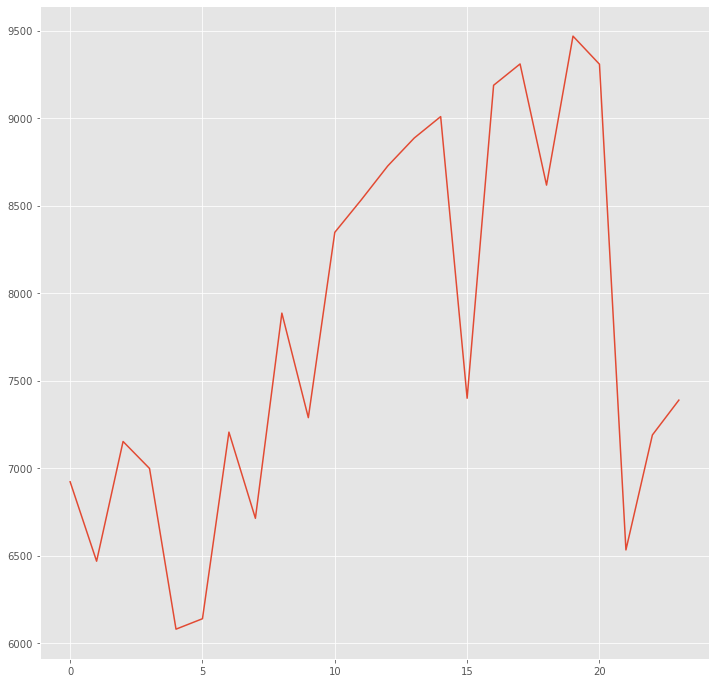

In [80]:
fig, ax =plt.subplots(figsize = (12,12))
ax.plot(x, y)
plt.show()

In [81]:
def func3(df,column, lst = np.arange(0,24)):
    
    d= {}
    for i in lst:
        filt =df['Hour Number']==i
        hour_avg = df.loc[filt][column].mean()
        d[i]=hour_avg
    x = d.keys()
    y = d.values()
    fig, ax =plt.subplots(figsize = (8,8))
    ax.plot(x, y)
    ax.set_title(column)
    ax.set_xlabel('Hours in Day')
    ax.set_xticks(lst)
    
    
    plt.show()
#     return d

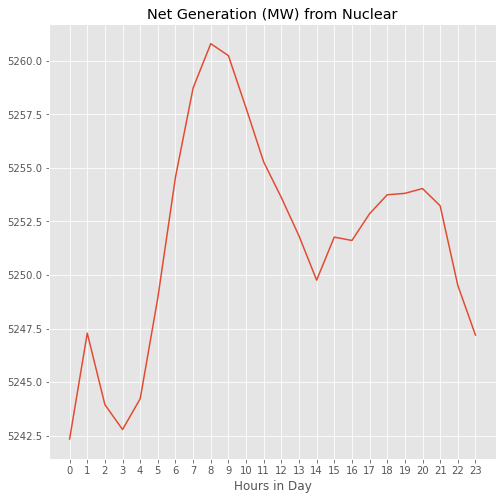

In [82]:
func3(df_total,'Net Generation (MW) from Nuclear' )

In [83]:
# x_nuc = demand_dct.keys()
# y_nuc =demand_dct.values()

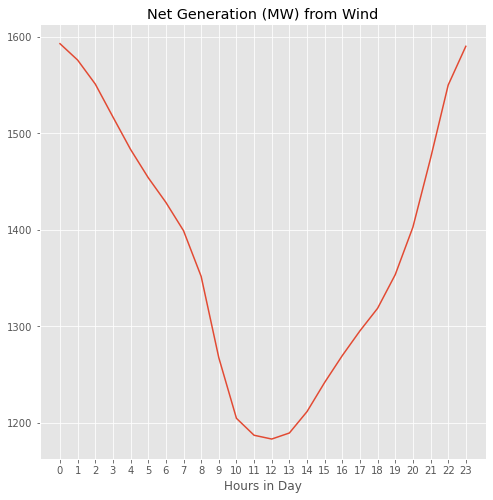

In [84]:
func3(df_total,'Net Generation (MW) from Wind' )

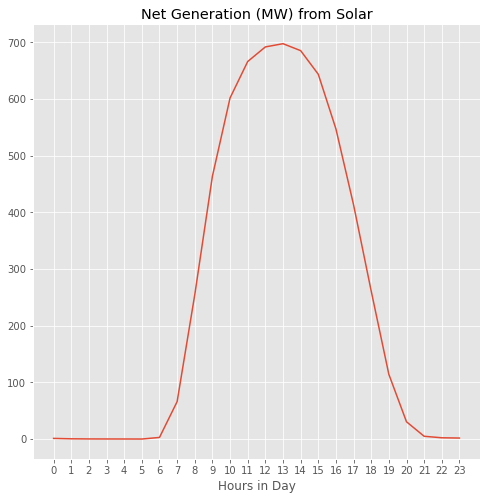

In [85]:
func3(df_total,'Net Generation (MW) from Solar' )

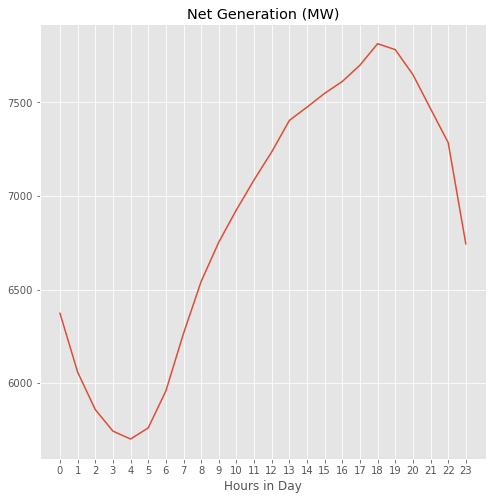

In [86]:
func3(df_total,'Net Generation (MW)' )

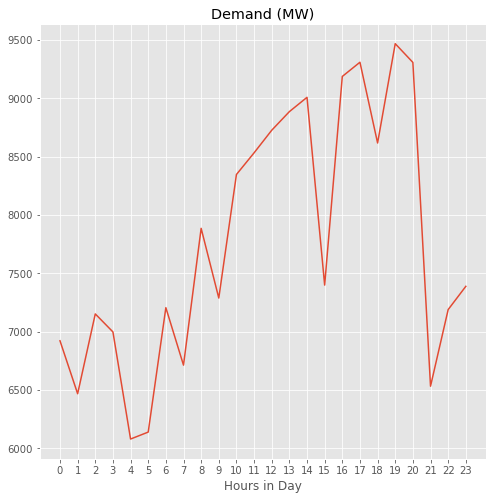

In [87]:
func3(df_total,'Demand (MW)' )

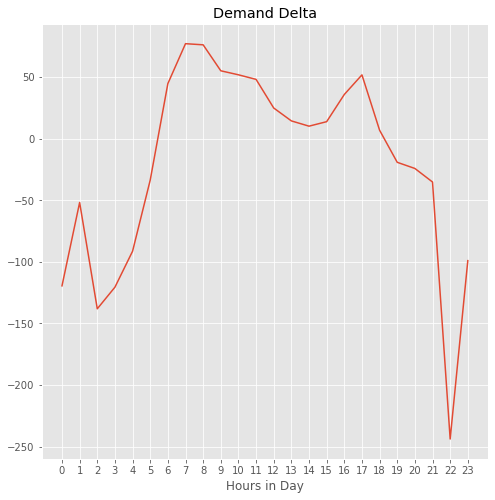

In [88]:
func3(df_total,'Demand Delta' )

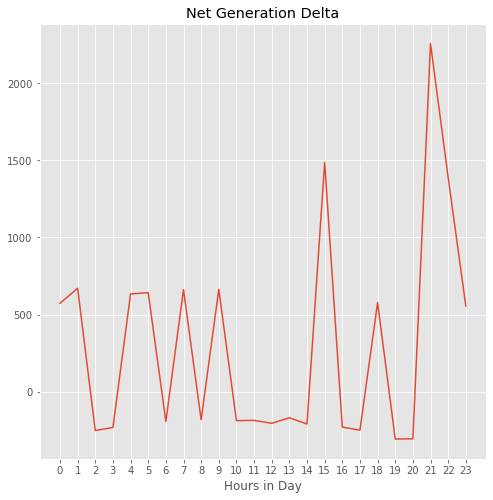

In [89]:
func3(df_total,'Net Generation Delta')

In [90]:
sample_data.head()
sample_data['Balancing Authority'].unique()

array(['SEPA', 'BANC', 'ISNE', 'SRP', 'TAL', 'TEC', 'IID', 'JEA', 'HST',
       'PACE', 'CPLE', 'GRIF', 'GWA', 'EPE', 'NYIS', 'TVA', 'PSEI',
       'CPLW', 'GRID', 'PGE', 'WALC', 'SCL', 'CHPD', 'SCEG', 'GVL',
       'BPAT', 'TPWR', 'CISO', 'FPC', 'AVRN', 'NEVP', 'LDWP', 'WACM',
       'SPA', 'ERCO', 'PNM', 'SOCO', 'HGMA', 'FPL', 'SWPP', 'AVA', 'GCPD',
       'PJM', 'WWA', 'DEAA', 'SEC', 'GLHB', 'DUK', 'NWMT', 'AEC', 'MISO',
       'WAUW', 'TEPC', 'AZPS', 'AECI', 'FMPP', 'PACW', 'LGEE', 'SC',
       'TIDC', 'IPCO', 'PSCO', 'DOPD', 'YAD'], dtype=object)

In [91]:
df_total.head()


,Balancing Authority,Data Date,Hour Number,Local Time at End of Hour,UTC Time at End of Hour,Demand Forecast (MW),Demand (MW),Net Generation (MW),Total Interchange (MW),Sum(Valid DIBAs) (MW),...,Net Generation (MW) from Nuclear,Net Generation (MW) from All Petroleum Products,Net Generation (MW) from Hydropower and Pumped Storage,Net Generation (MW) from Solar,Net Generation (MW) from Wind,Net Generation (MW) from Other Fuel Sources,Net Generation (MW) from Unknown Fuel Sources,New_datetime,Demand Delta,Net Generation Delta
0,AEC,01/01/2020,1,01/01/2020 1:00:00 AM,01/01/2020 7:00:00 AM,1082.0,549.0,722.0,173.0,173.0,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,2020-01-01 01:00:00,533.0,173.0
1,AEC,01/01/2020,2,01/01/2020 2:00:00 AM,01/01/2020 8:00:00 AM,1084.0,549.0,724.0,175.0,175.0,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,2020-01-01 02:00:00,535.0,175.0
2,AEC,01/01/2020,3,01/01/2020 3:00:00 AM,01/01/2020 9:00:00 AM,1103.0,554.0,718.0,164.0,164.0,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,2020-01-01 03:00:00,549.0,164.0
3,AEC,01/01/2020,4,01/01/2020 4:00:00 AM,01/01/2020 10:00:00 AM,1127.0,565.0,715.0,150.0,150.0,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,2020-01-01 04:00:00,562.0,150.0
4,AEC,01/01/2020,5,01/01/2020 5:00:00 AM,01/01/2020 11:00:00 AM,1179.0,575.0,718.0,143.0,143.0,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,2020-01-01 05:00:00,604.0,143.0


# Texas ERCO

In [92]:
filter_1 = df_total['Balancing Authority'] == 'ERCO'
df_texas = df_total[filter_1]
df_texas


# df_total.query('Balancing Authority' == 'ERCO')
# data.query('Senior_Management == True 
#             and Gender =="Male" and Team =="Marketing" 
#             and First_Name =="Johnny"', inplace = True) 

,Balancing Authority,Data Date,Hour Number,Local Time at End of Hour,UTC Time at End of Hour,Demand Forecast (MW),Demand (MW),Net Generation (MW),Total Interchange (MW),Sum(Valid DIBAs) (MW),...,Net Generation (MW) from Nuclear,Net Generation (MW) from All Petroleum Products,Net Generation (MW) from Hydropower and Pumped Storage,Net Generation (MW) from Solar,Net Generation (MW) from Wind,Net Generation (MW) from Other Fuel Sources,Net Generation (MW) from Unknown Fuel Sources,New_datetime,Demand Delta,Net Generation Delta
66924,ERCO,01/01/2020,1,01/01/2020 1:00:00 AM,01/01/2020 7:00:00 AM,37761.0,36649.0,36521.0,-128.0,-128.0,...,5117.0,NaN,20.0,0.0,12842.0,17.0,NaN,2020-01-01 01:00:00,1112.0,-128.0
66925,ERCO,01/01/2020,2,01/01/2020 2:00:00 AM,01/01/2020 8:00:00 AM,37154.0,36352.0,36225.0,-128.0,-128.0,...,5117.0,NaN,12.0,0.0,13340.0,13.0,NaN,2020-01-01 02:00:00,802.0,-127.0
66926,ERCO,01/01/2020,3,01/01/2020 3:00:00 AM,01/01/2020 9:00:00 AM,36644.0,35883.0,35824.0,-60.0,-60.0,...,5117.0,NaN,3.0,0.0,13926.0,15.0,NaN,2020-01-01 03:00:00,761.0,-59.0
66927,ERCO,01/01/2020,4,01/01/2020 4:00:00 AM,01/01/2020 10:00:00 AM,36668.0,35654.0,35532.0,-123.0,-123.0,...,5117.0,NaN,5.0,0.0,14458.0,12.0,NaN,2020-01-01 04:00:00,1014.0,-122.0
66928,ERCO,01/01/2020,5,01/01/2020 5:00:00 AM,01/01/2020 11:00:00 AM,36600.0,35816.0,35737.0,-80.0,-81.0,...,5117.0,NaN,42.0,0.0,14735.0,13.0,NaN,2020-01-01 05:00:00,784.0,-79.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70664,ERCO,12/31/2020,20,12/31/2020 8:00:00 PM,01/01/2021 2:00:00 AM,47945.0,49447.0,49287.0,-160.0,-161.0,...,5125.0,NaN,42.0,0.0,15591.0,12.0,NaN,2020-12-31 20:00:00,-1502.0,-160.0
70665,ERCO,12/31/2020,21,12/31/2020 9:00:00 PM,01/01/2021 3:00:00 AM,47758.0,48353.0,48320.0,-32.0,-32.0,...,5125.0,NaN,27.0,0.0,15447.0,11.0,NaN,2020-12-31 21:00:00,-595.0,-33.0
70666,ERCO,12/31/2020,22,12/31/2020 10:00:00 PM,01/01/2021 4:00:00 AM,47067.0,47095.0,47208.0,113.0,112.0,...,5125.0,NaN,19.0,0.0,14994.0,10.0,NaN,2020-12-31 22:00:00,-28.0,113.0
70667,ERCO,12/31/2020,23,12/31/2020 11:00:00 PM,01/01/2021 5:00:00 AM,45514.0,45460.0,45418.0,-42.0,-43.0,...,5127.0,NaN,0.0,0.0,14558.0,13.0,NaN,2020-12-31 23:00:00,54.0,-42.0


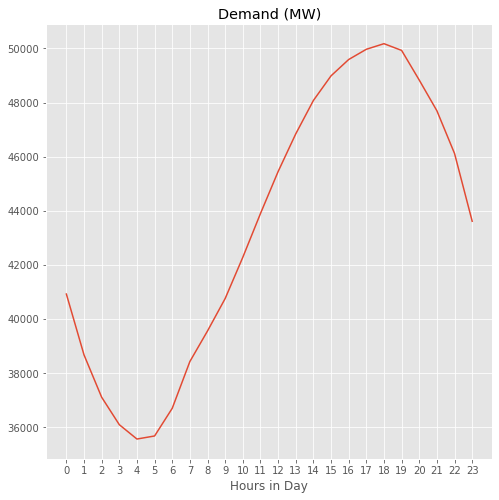

In [93]:
func3(df_texas, 'Demand (MW)')

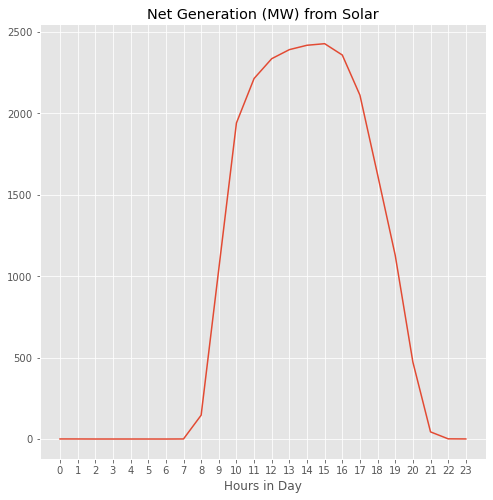

In [94]:
func3(df_texas, 'Net Generation (MW) from Solar')

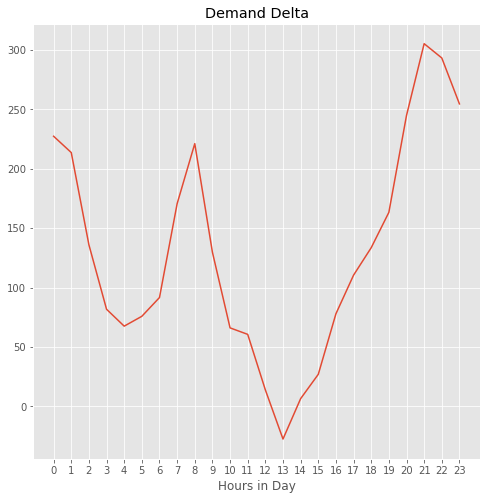

In [139]:
func3(df_texas, 'Demand Delta')

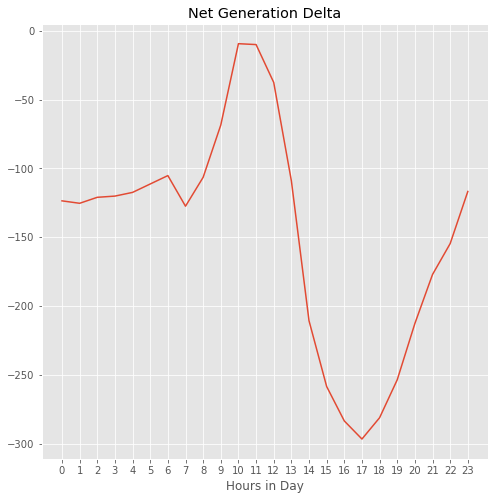

In [95]:
func3(df_texas, 'Net Generation Delta')

In [96]:
df_texas.columns
catagories_lst = ['Demand Forecast (MW)''Net Generation (MW) (Imputed)',
       'Demand (MW) (Adjusted)', 'Net Generation (MW) (Adjusted)',
       'Net Generation (MW) from Coal', 'Net Generation (MW) from Natural Gas',
       'Net Generation (MW) from Nuclear',
       'Net Generation (MW) from All Petroleum Products',
       'Net Generation (MW) from Hydropower and Pumped Storage',
       'Net Generation (MW) from Solar', 'Net Generation (MW) from Wind','Demand Delta', 'Net Generation Delta']

In [97]:



def func_tex(df,catagory_lst, rang = np.arange(0,24)):
#      d = {}
#     for i in catagory_lst:
#         if i not in d:
#             d[i]={}
            
    d = dct_maker(df_total,catagory_lst, lst = np.arange(0,24))
    for item in catagory_lst:
        for i in rang:
            filt =df['Hour Number']==i
            hour_avg = df.loc[filt][item].mean()
            item[i]=hour_avg
            
            
        x = item.keys()
        y = item.values()
    fig, ax =plt.subplots(figsize = (8,8))
    ax.plot(x, y)
    ax.set_title('energy sources')
    ax.set_xlabel('Hours in Day')
    ax.set_xticks(lst)
    return d
# func_tex(df_total,catagories_lst, rang = np.arange(0,24))

In [98]:
def dct_maker(df,catagory_lst, lst = np.arange(0,24)):
    d = {}
    for i in catagory_lst:
        if i not in d:
            d[i]={}
    return d
dct_maker(df_total,catagories_lst, lst = np.arange(0,24))

{'Demand Forecast (MW)Net Generation (MW) (Imputed)': {},
 'Demand (MW) (Adjusted)': {},
 'Net Generation (MW) (Adjusted)': {},
 'Net Generation (MW) from Coal': {},
 'Net Generation (MW) from Natural Gas': {},
 'Net Generation (MW) from Nuclear': {},
 'Net Generation (MW) from All Petroleum Products': {},
 'Net Generation (MW) from Hydropower and Pumped Storage': {},
 'Net Generation (MW) from Solar': {},
 'Net Generation (MW) from Wind': {},
 'Demand Delta': {},
 'Net Generation Delta': {}}

In [99]:
def func4(df,column, lst = np.arange(0,24)):
    
    
    Demand_Forecast={}
    Net_Generation={}
    Demand={}
    Net_Generation_Adjusted={}
    Net_Generation_Coal={} 
    Net_Generation_Natural_Gas={}
    Net_Generation_Nuclear={}
    Net_Generation_Petroleum={}
    Net_Generation_Hydropower={}
    Net_Generation_Solar={}
    Net_Generation_Wind={}
    Demand_Delta={}
    Net_Generation_Delta={}
    
   
    
    for i in lst:
        filt =df['Hour Number']==i
        hour_avg = df.loc[filt][column].mean()
        d[i]=hour_avg
    x = d.keys()
    y = d.values()
    fig, ax =plt.subplots(figsize = (8,8))
    ax.plot(x, y)
    ax.plot(x1, y1)
    ax.set_title(column)
    ax.set_xlabel('Hours in Day')
    ax.set_xticks(lst)
    
    
    plt.show()

In [46]:
def func_tester(df,column, lst = np.arange(0,24)):
    fig, ax =plt.subplots(figsize = (8,8))
  
    
    for item in col_list:
        for i in lst:
            d= {}
            filt =df['Hour Number']==i
            hour_avg = df.loc[filt][column].mean()
            d[i]=hour_avg
            x = d.keys()
            y = d.values()

            ax.plot(x, y)
#             d = {}
        ax.set_title(column)
        ax.set_xlabel('Hours in Day')
        ax.set_xticks(lst)

    
    plt.show()
#     return d

In [106]:
df_texas
del df_texas['UTC Time at End of Hour']
del df_texas['Balancing Authority']
del df_texas['Net Generation (MW) (Imputed)']
df_texas

KeyError: 'UTC Time at End of Hour'

In [108]:
df_texas

,Data Date,Hour Number,Local Time at End of Hour,Demand Forecast (MW),Demand (MW),Net Generation (MW),Total Interchange (MW),Sum(Valid DIBAs) (MW),Demand (MW) (Imputed),Demand (MW) (Adjusted),...,Net Generation (MW) from Nuclear,Net Generation (MW) from All Petroleum Products,Net Generation (MW) from Hydropower and Pumped Storage,Net Generation (MW) from Solar,Net Generation (MW) from Wind,Net Generation (MW) from Other Fuel Sources,Net Generation (MW) from Unknown Fuel Sources,New_datetime,Demand Delta,Net Generation Delta
66924,01/01/2020,1,01/01/2020 1:00:00 AM,37761.0,36649.0,36521.0,-128.0,-128.0,NaN,36649.0,...,5117.0,NaN,20.0,0.0,12842.0,17.0,NaN,2020-01-01 01:00:00,1112.0,-128.0
66925,01/01/2020,2,01/01/2020 2:00:00 AM,37154.0,36352.0,36225.0,-128.0,-128.0,NaN,36352.0,...,5117.0,NaN,12.0,0.0,13340.0,13.0,NaN,2020-01-01 02:00:00,802.0,-127.0
66926,01/01/2020,3,01/01/2020 3:00:00 AM,36644.0,35883.0,35824.0,-60.0,-60.0,NaN,35883.0,...,5117.0,NaN,3.0,0.0,13926.0,15.0,NaN,2020-01-01 03:00:00,761.0,-59.0
66927,01/01/2020,4,01/01/2020 4:00:00 AM,36668.0,35654.0,35532.0,-123.0,-123.0,NaN,35654.0,...,5117.0,NaN,5.0,0.0,14458.0,12.0,NaN,2020-01-01 04:00:00,1014.0,-122.0
66928,01/01/2020,5,01/01/2020 5:00:00 AM,36600.0,35816.0,35737.0,-80.0,-81.0,NaN,35816.0,...,5117.0,NaN,42.0,0.0,14735.0,13.0,NaN,2020-01-01 05:00:00,784.0,-79.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70664,12/31/2020,20,12/31/2020 8:00:00 PM,47945.0,49447.0,49287.0,-160.0,-161.0,NaN,49447.0,...,5125.0,NaN,42.0,0.0,15591.0,12.0,NaN,2020-12-31 20:00:00,-1502.0,-160.0
70665,12/31/2020,21,12/31/2020 9:00:00 PM,47758.0,48353.0,48320.0,-32.0,-32.0,NaN,48353.0,...,5125.0,NaN,27.0,0.0,15447.0,11.0,NaN,2020-12-31 21:00:00,-595.0,-33.0
70666,12/31/2020,22,12/31/2020 10:00:00 PM,47067.0,47095.0,47208.0,113.0,112.0,NaN,47095.0,...,5125.0,NaN,19.0,0.0,14994.0,10.0,NaN,2020-12-31 22:00:00,-28.0,113.0
70667,12/31/2020,23,12/31/2020 11:00:00 PM,45514.0,45460.0,45418.0,-42.0,-43.0,NaN,45460.0,...,5127.0,NaN,0.0,0.0,14558.0,13.0,NaN,2020-12-31 23:00:00,54.0,-42.0


In [102]:
df_texas['Balancing Authority'].unique()

array(['ERCO'], dtype=object)

In [103]:
df_texas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8784 entries, 66924 to 70668
Data columns (total 26 columns):
 #   Column                                                  Non-Null Count  Dtype         
---  ------                                                  --------------  -----         
 0   Balancing Authority                                     8784 non-null   object        
 1   Data Date                                               8784 non-null   object        
 2   Hour Number                                             8784 non-null   int64         
 3   Local Time at End of Hour                               8784 non-null   object        
 4   UTC Time at End of Hour                                 8784 non-null   object        
 5   Demand Forecast (MW)                                    8784 non-null   float64       
 6   Demand (MW)                                             8784 non-null   float64       
 7   Net Generation (MW)                                    

In [109]:
df_texas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8784 entries, 66924 to 70668
Data columns (total 23 columns):
 #   Column                                                  Non-Null Count  Dtype         
---  ------                                                  --------------  -----         
 0   Data Date                                               8784 non-null   object        
 1   Hour Number                                             8784 non-null   int64         
 2   Local Time at End of Hour                               8784 non-null   object        
 3   Demand Forecast (MW)                                    8784 non-null   float64       
 4   Demand (MW)                                             8784 non-null   float64       
 5   Net Generation (MW)                                     8784 non-null   float64       
 6   Total Interchange (MW)                                  8784 non-null   float64       
 7   Sum(Valid DIBAs) (MW)                                  

In [110]:
df_texas.shape

(8784, 23)

In [112]:
df_texas['Data Date'].value_counts()

11/01/2020    25
01/03/2020    24
08/23/2020    24
07/29/2020    24
04/24/2020    24
              ..
02/08/2020    24
10/12/2020    24
08/29/2020    24
06/21/2020    24
03/08/2020    23
Name: Data Date, Length: 366, dtype: int64

In [115]:
df_texas.to_csv (r'/Users/cp/Desktop/capstone2/df_texas_cleanv1.csv', index = False, header=True)

In [114]:
converted_houston_temp_24 = pd.read_csv ('/Users/cp/Desktop/capstone2/Houston_weather_hours.csv')

In [116]:
# result = pd.merge(df_texas, converted_houston_temp_24, on =['New_datetime', 'New_datetime'])
df_texas.join(converted_houston_temp_24, on ='New_datetime', how = 'left')

ValueError: You are trying to merge on datetime64[ns] and int64 columns. If you wish to proceed you should use pd.concat

In [118]:
converted_houston_temp_24.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Temp_avg       8760 non-null   float64
 1   Temp_min       8760 non-null   int64  
 2   Dew_max        8760 non-null   int64  
 3   Dew_avg        8760 non-null   float64
 4   Dew_min        8760 non-null   int64  
 5   Hum_max        8760 non-null   int64  
 6   Hum_avg        8760 non-null   float64
 7   Hum_min        8760 non-null   int64  
 8   Wind_max       8760 non-null   int64  
 9   Wind_avg       8760 non-null   float64
 10  Wind_min       8760 non-null   int64  
 11  Pres_max       8760 non-null   float64
 12  Pres_avg       8760 non-null   float64
 13  Pres_min       8760 non-null   float64
 14  Precipitation  8760 non-null   float64
 15  Date           8760 non-null   object 
 16  Hour Number    8760 non-null   int64  
 17  New_datetime   8760 non-null   object 
dtypes: float

In [119]:
converted_houston_temp_24

,Temp_avg,Temp_min,Dew_max,Dew_avg,Dew_min,Hum_max,Hum_avg,Hum_min,Wind_max,Wind_avg,Wind_min,Pres_max,Pres_avg,Pres_min,Precipitation,Date,Hour Number,New_datetime
0,57.5,53,58,46.3,36,93,68.1,45,14,8.2,0,30.1,29.9,29.7,0.00,2020-1-1,0,2020-01-01 00:00:00
1,57.5,53,58,46.3,36,93,68.1,45,14,8.2,0,30.1,29.9,29.7,0.00,2020-1-1,1,2020-01-01 01:00:00
2,57.5,53,58,46.3,36,93,68.1,45,14,8.2,0,30.1,29.9,29.7,0.00,2020-1-1,2,2020-01-01 02:00:00
3,57.5,53,58,46.3,36,93,68.1,45,14,8.2,0,30.1,29.9,29.7,0.00,2020-1-1,3,2020-01-01 03:00:00
4,57.5,53,58,46.3,36,93,68.1,45,14,8.2,0,30.1,29.9,29.7,0.00,2020-1-1,4,2020-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,61.4,45,67,57.2,36,94,86.1,71,23,13.8,6,29.8,29.6,29.5,0.19,2020-12-31,19,2020-12-31 19:00:00
8756,61.4,45,67,57.2,36,94,86.1,71,23,13.8,6,29.8,29.6,29.5,0.19,2020-12-31,20,2020-12-31 20:00:00
8757,61.4,45,67,57.2,36,94,86.1,71,23,13.8,6,29.8,29.6,29.5,0.19,2020-12-31,21,2020-12-31 21:00:00
8758,61.4,45,67,57.2,36,94,86.1,71,23,13.8,6,29.8,29.6,29.5,0.19,2020-12-31,22,2020-12-31 22:00:00


In [120]:
converted_houston_temp_24['New_datetime'] = pd.to_datetime(converted_houston_temp_24['New_datetime'],infer_datetime_format=True, format ='%m/%d/%Y %H')

In [124]:
df_texas.join(converted_houston_temp_24, on ='New_datetime', how = 'left')

ValueError: You are trying to merge on datetime64[ns] and int64 columns. If you wish to proceed you should use pd.concat

In [123]:
converted_houston_temp_24.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Temp_avg       8760 non-null   float64       
 1   Temp_min       8760 non-null   int64         
 2   Dew_max        8760 non-null   int64         
 3   Dew_avg        8760 non-null   float64       
 4   Dew_min        8760 non-null   int64         
 5   Hum_max        8760 non-null   int64         
 6   Hum_avg        8760 non-null   float64       
 7   Hum_min        8760 non-null   int64         
 8   Wind_max       8760 non-null   int64         
 9   Wind_avg       8760 non-null   float64       
 10  Wind_min       8760 non-null   int64         
 11  Pres_max       8760 non-null   float64       
 12  Pres_avg       8760 non-null   float64       
 13  Pres_min       8760 non-null   float64       
 14  Precipitation  8760 non-null   float64       
 15  Date           8760 n

In [125]:
df_texas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8784 entries, 66924 to 70668
Data columns (total 23 columns):
 #   Column                                                  Non-Null Count  Dtype         
---  ------                                                  --------------  -----         
 0   Data Date                                               8784 non-null   object        
 1   Hour Number                                             8784 non-null   int64         
 2   Local Time at End of Hour                               8784 non-null   object        
 3   Demand Forecast (MW)                                    8784 non-null   float64       
 4   Demand (MW)                                             8784 non-null   float64       
 5   Net Generation (MW)                                     8784 non-null   float64       
 6   Total Interchange (MW)                                  8784 non-null   float64       
 7   Sum(Valid DIBAs) (MW)                                  

In [127]:
converted_houston_temp_24.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Temp_avg       8760 non-null   float64       
 1   Temp_min       8760 non-null   int64         
 2   Dew_max        8760 non-null   int64         
 3   Dew_avg        8760 non-null   float64       
 4   Dew_min        8760 non-null   int64         
 5   Hum_max        8760 non-null   int64         
 6   Hum_avg        8760 non-null   float64       
 7   Hum_min        8760 non-null   int64         
 8   Wind_max       8760 non-null   int64         
 9   Wind_avg       8760 non-null   float64       
 10  Wind_min       8760 non-null   int64         
 11  Pres_max       8760 non-null   float64       
 12  Pres_avg       8760 non-null   float64       
 13  Pres_min       8760 non-null   float64       
 14  Precipitation  8760 non-null   float64       
 15  Date           8760 n

In [128]:
df_texas.join(converted_houston_temp_24, on ='New_datetime', how = 'left')

ValueError: You are trying to merge on datetime64[ns] and int64 columns. If you wish to proceed you should use pd.concat

In [132]:
Energy_Houston_weather=df_texas.merge(converted_houston_temp_24, left_on ='New_datetime', right_on='New_datetime' )

In [133]:
Energy_Houston_weather

,Data Date,Hour Number_x,Local Time at End of Hour,Demand Forecast (MW),Demand (MW),Net Generation (MW),Total Interchange (MW),Sum(Valid DIBAs) (MW),Demand (MW) (Imputed),Demand (MW) (Adjusted),...,Hum_min,Wind_max,Wind_avg,Wind_min,Pres_max,Pres_avg,Pres_min,Precipitation,Date,Hour Number_y
0,01/01/2020,1,01/01/2020 1:00:00 AM,37761.0,36649.0,36521.0,-128.0,-128.0,NaN,36649.0,...,45,14,8.2,0,30.1,29.9,29.7,0.00,2020-1-1,1
1,01/01/2020,2,01/01/2020 2:00:00 AM,37154.0,36352.0,36225.0,-128.0,-128.0,NaN,36352.0,...,45,14,8.2,0,30.1,29.9,29.7,0.00,2020-1-1,2
2,01/01/2020,3,01/01/2020 3:00:00 AM,36644.0,35883.0,35824.0,-60.0,-60.0,NaN,35883.0,...,45,14,8.2,0,30.1,29.9,29.7,0.00,2020-1-1,3
3,01/01/2020,4,01/01/2020 4:00:00 AM,36668.0,35654.0,35532.0,-123.0,-123.0,NaN,35654.0,...,45,14,8.2,0,30.1,29.9,29.7,0.00,2020-1-1,4
4,01/01/2020,5,01/01/2020 5:00:00 AM,36600.0,35816.0,35737.0,-80.0,-81.0,NaN,35816.0,...,45,14,8.2,0,30.1,29.9,29.7,0.00,2020-1-1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,12/31/2020,20,12/31/2020 8:00:00 PM,47945.0,49447.0,49287.0,-160.0,-161.0,NaN,49447.0,...,71,23,13.8,6,29.8,29.6,29.5,0.19,2020-12-31,20
8756,12/31/2020,21,12/31/2020 9:00:00 PM,47758.0,48353.0,48320.0,-32.0,-32.0,NaN,48353.0,...,71,23,13.8,6,29.8,29.6,29.5,0.19,2020-12-31,21
8757,12/31/2020,22,12/31/2020 10:00:00 PM,47067.0,47095.0,47208.0,113.0,112.0,NaN,47095.0,...,71,23,13.8,6,29.8,29.6,29.5,0.19,2020-12-31,22
8758,12/31/2020,23,12/31/2020 11:00:00 PM,45514.0,45460.0,45418.0,-42.0,-43.0,NaN,45460.0,...,71,23,13.8,6,29.8,29.6,29.5,0.19,2020-12-31,23


In [134]:
Energy_Houston_weather.to_csv (r'/Users/cp/Desktop/capstone2/Energy_Houston_weather.csv', index = False, header=True)

In [136]:
Energy_Houston_weather.columns

Index(['Data Date', 'Hour Number_x', 'Local Time at End of Hour',
       'Demand Forecast (MW)', 'Demand (MW)', 'Net Generation (MW)',
       'Total Interchange (MW)', 'Sum(Valid DIBAs) (MW)',
       'Demand (MW) (Imputed)', 'Demand (MW) (Adjusted)',
       'Net Generation (MW) (Adjusted)', 'Net Generation (MW) from Coal',
       'Net Generation (MW) from Natural Gas',
       'Net Generation (MW) from Nuclear',
       'Net Generation (MW) from All Petroleum Products',
       'Net Generation (MW) from Hydropower and Pumped Storage',
       'Net Generation (MW) from Solar', 'Net Generation (MW) from Wind',
       'Net Generation (MW) from Other Fuel Sources',
       'Net Generation (MW) from Unknown Fuel Sources', 'New_datetime',
       'Demand Delta', 'Net Generation Delta', 'Temp_avg', 'Temp_min',
       'Dew_max', 'Dew_avg', 'Dew_min', 'Hum_max', 'Hum_avg', 'Hum_min',
       'Wind_max', 'Wind_avg', 'Wind_min', 'Pres_max', 'Pres_avg', 'Pres_min',
       'Precipitation', 'Date', 'Hour N

In [137]:
Energy_Houston_weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8760 entries, 0 to 8759
Data columns (total 40 columns):
 #   Column                                                  Non-Null Count  Dtype         
---  ------                                                  --------------  -----         
 0   Data Date                                               8760 non-null   object        
 1   Hour Number_x                                           8760 non-null   int64         
 2   Local Time at End of Hour                               8760 non-null   object        
 3   Demand Forecast (MW)                                    8760 non-null   float64       
 4   Demand (MW)                                             8760 non-null   float64       
 5   Net Generation (MW)                                     8760 non-null   float64       
 6   Total Interchange (MW)                                  8760 non-null   float64       
 7   Sum(Valid DIBAs) (MW)                                   8760

In [138]:
df_texas['Net Generation Delta']

66924   -128.0
66925   -127.0
66926    -59.0
66927   -122.0
66928    -79.0
         ...  
70664   -160.0
70665    -33.0
70666    113.0
70667    -42.0
70668   -108.0
Name: Net Generation Delta, Length: 8784, dtype: float64